In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-29 19:10:46.509004: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-29 19:10:46.594937: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-29 19:10:47.799186: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Haemulidae/RJ_Reconstrucao_Haemulidae_2024_08_09.xlsx')
df_Roncador_art = pd.DataFrame(df[['Ano','Roncador_art']])

dados = df_Roncador_art.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1978,1979,1990,1991,1992,1993,1994,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Roncador_art'].values
dados.head()

,Ano,Roncador_art
26,1976,97.0
27,1977,96.0
30,1980,116.0
31,1981,118.0
32,1982,149.0


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [45]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=600, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Haemulidae/Roncador/pesos pesca art/.weights.h5', overwrite=True)

Epoch 1/600


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.0369
Epoch 2/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9690 
Epoch 3/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9110 
Epoch 4/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8556 
Epoch 5/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7839 
Epoch 6/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7490 
Epoch 7/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7121 
Epoch 8/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7069 
Epoch 9/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6944 
Epoch 10/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6675 
Epoch 11/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6784 
Epoch 12/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6713 
Epoch 13/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6673 
Epoch 14/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6734 
Epoch 15/600
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4818 
Epoch 16/600
2/2 ━━━━━━━━━━━━━━━

In [46]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Haemulidae/Roncador/pesos pesca art/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Previsões dos dados ausentes: [[  0.       ]
 [  3.7412262]
 [  7.812088 ]
 [ 11.905052 ]
 [ 16.044346 ]
 [ 20.27306  ]
 [ 24.50203  ]
 [ 28.71088  ]
 [ 32.908527 ]
 [ 37.112274 ]
 [ 41.32189  ]
 [ 45.531548 ]
 [ 49.741116 ]
 [ 53.91359  ]
 [ 58.216064 ]
 [ 62.518753 ]
 [ 66.82152  ]
 [ 71.17311  ]
 [ 75.543884 ]
 [ 79.76786  ]
 [ 83.86068  ]
 [ 88.096886 ]
 [ 92.34699  ]
 [ 96.56025  ]
 [100.77105  ]
 [104.77794  ]
 [116.217865 ]
 [120.09974  ]
 [167.08798  ]
 [131.7966   ]
 [102.48402  ]
 [ 77.292725 ]
 [ 55.428905 ]
 [ 15.474739 ]]


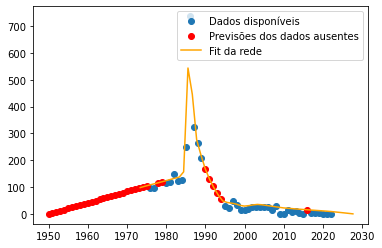

In [47]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

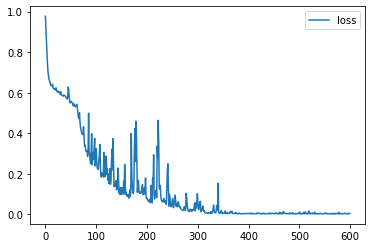

In [48]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [49]:
#Planilha com os dados preenchidos

df_previsoes = pd.DataFrame({'Ano':anos_para_prever, 'Roncador_art':prev_ausentes.flatten()})

df_preenchido = pd.concat((dados,df_previsoes)).sort_values('Ano')

df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Haemulidae/Roncador/Interpolações Roncador_art.xlsx')

df_preenchido

,Ano,Roncador_art
0,1950,0.000000
1,1951,3.741226
2,1952,7.812088
3,1953,11.905052
4,1954,16.044346
...,...,...
68,2018,3.548300
69,2019,2.288700
70,2020,1.190500
71,2021,1.227500
